<a href="https://colab.research.google.com/github/volpter/ML_comment_selection/blob/main/NLP_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.svm import SVC


In [ ]:
main_df = pd.read_csv('news.csv')
main_df.label=main_df.label.map({'FAKE': 0, 'REAL': 1})
main_df.rename({main_df.columns[0]: 'id'}, axis = 1)

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,1
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,0
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",1


In [ ]:
train_X, test_X, train_y, test_y = train_test_split(main_df.text,
                                                    main_df.label, test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(stop_words ='english', max_df=0.7)


In [ ]:
train_X, test_X = vectorizer.fit_transform(train_X), vectorizer.transform(test_X)

In [ ]:
model = PassiveAggressiveClassifier(max_iter=500)
model.fit(train_X, train_y)

In [30]:
pred = model.predict(test_X)
print (accuracy_score(test_y, pred), recall_score(test_y, pred))

0.936069455406472 0.9327073552425665


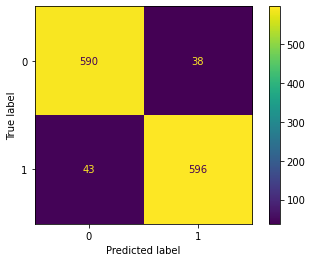

In [32]:
ConfusionMatrixDisplay.from_predictions(test_y, pred)

In [35]:
svc_model = SVC(max_iter=500)
svc_model.fit(train_X, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(max_iter=500)

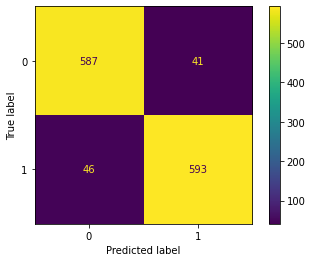

In [36]:
pred_svc = svc_model.predict(test_X)
ConfusionMatrixDisplay.from_predictions(test_y, pred_svc)

In [37]:
accuracy_score(test_y, pred_svc)

0.9313338595106551